# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=['Unknown', 'UNKNOWN'])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [3]:
df.shape

(30000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29540 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3974 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

This dataset contains information about licenses issued for dogs in NYC.

`Owner Zip Code`: Zip code where the owner lives

`Animal Name`: The name of the animal

`Animal Gender`: The gender of the animal

`Primary Breed`: The primary breed of the animal

`Secondary Breed`: The secondary breed of the animal (where applicable)

`Animal Dominant Color`: The animal's main colour

`Animal Secondary Color`: The animal's secondary colour (where applicable)

`Animal Third Color`: The animal's third colour (where applicable)

`Animal Birth`: The animal's date of birth

`Spayed or Neut`: Yes/No depending on where the animal is spayed/neutered

`Guard or Trained`: Yes/No depending on whether the animal is a guard dog or has received training

`Vaccinated`: Yes/No depending on vaccination status

`Application Date`: Date and time of application

`License Issued Date`: Date license was issued

`License Expired Date`: Date license expires

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. What proportion of dogs are not vaccinated?
2. Which zip code has the most unspayed/unneutered dogs?
3. What is the most popular name for Rottweilers?
4. On average, are males or females more likely to be unspayed/unneutered?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

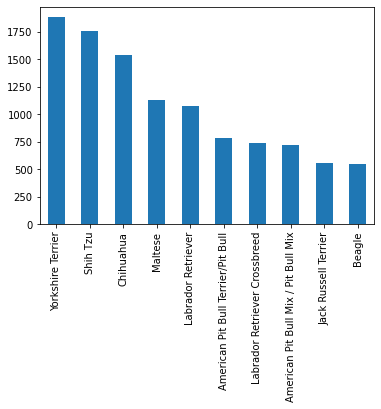

In [5]:
df['Primary Breed'].value_counts().head(10).plot.bar()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [6]:
# added na_values = 'Unknown' to the initial pd.read_excel()

## What are the most popular dog names?

In [7]:
df['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [8]:
df[df['Animal Name'] == 'Pete']['Animal Name'].value_counts()

Pete    8
Name: Animal Name, dtype: int64

In [9]:
df[(df['Animal Name'] == 'Max') | (df['Animal Name'] == 'Maxwell')]['Animal Name'].value_counts()

Max        202
Maxwell     11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

In [10]:
df['Guard or Trained'].value_counts(normalize=True) * 100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [11]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [12]:
df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [13]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [14]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [15]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [16]:
df['age'] = 2022 - df.year
df.age.mean()

12.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [17]:
neighborhoods_df = pd.read_csv('zipcodes-neighborhoods.csv')
df = df.merge(neighborhoods_df, left_on='Owner Zip Code', right_on='zip')
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [18]:
df[df.borough == 'Bronx']['Animal Name'].value_counts().nlargest(1)

Bella    22
Name: Animal Name, dtype: int64

In [19]:
df[df.borough == 'Brooklyn']['Animal Name'].value_counts().nlargest(1)

Max    46
Name: Animal Name, dtype: int64

In [20]:
df[df.neighborhood == 'Upper East Side']['Animal Name'].value_counts().nlargest(1)

Charlie    19
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [21]:
df.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

In [22]:
# This is the answer I initially cobbled together using StackOverflow. The values are missing, but it looks nicer!
df.groupby('neighborhood')['Primary Breed'].agg(pd.Series.mode).to_frame()

,Primary Breed
neighborhood,
Borough Park,Yorkshire Terrier
Bronx Park and Fordham,Yorkshire Terrier
Bushwick and Williamsburg,Yorkshire Terrier
Canarsie and Flatlands,Shih Tzu
Central Bronx,Yorkshire Terrier
Central Brooklyn,Shih Tzu
Central Harlem,Chihuahua
Central Queens,Yorkshire Terrier
Chelsea and Clinton,Chihuahua


## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

This is the solution I was help towards in office hours, but I don't think it answers the question very effectively! e.g. Here I can only see one example of a breed where 100% have _not_ been spayed/neutered, which is what I understood to question to be asking.

In [23]:
df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).sort_values(ascending=False)

Primary Breed                  Spayed or Neut
English Springer Spaniel       Yes               1.000000
Finnish Spitz                  Yes               1.000000
Dogo Argentino                 No                1.000000
Bouvier Des Flandres           Yes               1.000000
Dutch Shepherd                 Yes               1.000000
                                                   ...   
Labrador Retriever Crossbreed  No                0.041494
Welsh Corgi, Cardigan          No                0.040000
German Shepherd Crossbreed     No                0.033613
Greyhound                      No                0.017857
Bassett Hound                  No                0.017241
Name: Spayed or Neut, Length: 427, dtype: float64

In [24]:
df.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).sort_values(ascending=False)



Animal Gender  Spayed or Neut
               Yes               1.000000
F              Yes               0.857565
M              Yes               0.791323
               No                0.208677
F              No                0.142435
Name: Spayed or Neut, dtype: float64

Below is the longwinded solution I originally came up with before consulting a TA.

It is far less elegant than the single line of code above, but it filters down to just breeds where 100% were unspayed, which was my interpretation of the question.

In [25]:
spayed_df = df.groupby(['Primary Breed', 'Spayed or Neut'])\
    .agg(total = ('Spayed or Neut', 'count'))\
    .reset_index()

spayed_pivot = spayed_df.pivot(index = 'Primary Breed', columns = 'Spayed or Neut', values = 'total').fillna(0)

spayed_pivot['total'] = spayed_pivot.No + spayed_pivot.Yes
spayed_pivot['pc_unspayed'] = (spayed_pivot.No / spayed_pivot.total) * 100

spayed_pivot.query("pc_unspayed == pc_unspayed.max()").sort_values(by=['pc_unspayed', 'total'], ascending = False)

Spayed or Neut,No,Yes,total,pc_unspayed
Primary Breed,,,,
"Mastiff, Tibetan",3.0,0.0,3.0,100.0
"Mastiff, French (Dogue de Bordeaux)",2.0,0.0,2.0,100.0
Polish Hound,2.0,0.0,2.0,100.0
Treeing Tennessee Brindle,2.0,0.0,2.0,100.0
Borzoi,1.0,0.0,1.0,100.0
Canaan Dog,1.0,0.0,1.0,100.0
Dogo Argentino,1.0,0.0,1.0,100.0
Fila Brasileiro,1.0,0.0,1.0,100.0
French Spaniel,1.0,0.0,1.0,100.0


In [26]:
spayed_df = df.groupby(['Animal Gender', 'Spayed or Neut'])\
    .agg(total = ('Spayed or Neut', 'count'))\
    .reset_index()

spayed_pivot = spayed_df.pivot(index = 'Animal Gender', columns = 'Spayed or Neut', values = 'total', )
spayed_pivot = spayed_pivot.fillna(0)

spayed_pivot['total'] = spayed_pivot.No + spayed_pivot.Yes
spayed_pivot['pc_unspayed'] = (spayed_pivot.No / spayed_pivot.total) * 100

spayed_pivot.sort_values(by = 'pc_unspayed', ascending = False)

Spayed or Neut,No,Yes,total,pc_unspayed
Animal Gender,,,,
M,3343.0,12677.0,16020.0,20.867665
F,1930.0,11620.0,13550.0,14.243542
,0.0,3.0,3.0,0.000000


## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [27]:
df['Animal Dominant Color'] = df['Animal Dominant Color'].str.upper()
df['Animal Secondary Color'] = df['Animal Secondary Color'].str.upper()
df['Animal Third Color'] = df['Animal Third Color'].str.upper()

mono_colors = ['BLACK', 'WHITE', 'GREY']

I discussed this with Ilena at office hours.

My interpretation of the question was that we were being asked to assign `True` if an animal (a) only had one color in `Animal Dominant Color`, `Animal Secondary Color Animal` or `Third Color` and (b) that color was black, white or grey.

I'm sure my solution is overly complicated. I am looking forward to seeing a simpler solution!

In [28]:
def check_colors(*colors):
    n_colors = 0
    n_mono = 0
    for color in colors:
        if type(color) == str:
            n_colors += 1
            if color in mono_colors:
                n_mono += 1
    if n_colors == 1 and n_mono == 1:
        return True
    else:
        return False

df['monochrome'] = df.apply(lambda x: check_colors(x['Animal Dominant Color'], x['Animal Secondary Color'], x['Animal Third Color']), axis = 1)
df.monochrome.sum()

3895

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

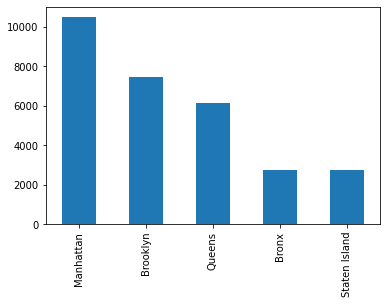

In [29]:
df.borough.value_counts().plot(kind='bar')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [30]:
boro_pops = pd.read_csv('boro_population.csv')

# Calculate value counts for total dogs in each borough
dogs_per_borough = df.borough.value_counts().reset_index()
# Rename columns
dogs_per_borough = dogs_per_borough.rename(columns = {'index': 'borough', 'borough': 'n_dogs'})
# Merge with data population csv
dogs_per_borough = dogs_per_borough.merge(boro_pops, left_on = 'borough', right_on = 'borough')
# Calculate dogs per capita in each borough
dogs_per_borough['dogs_per_capita'] = dogs_per_borough.n_dogs / dogs_per_borough.population

# Sort dataframe so borough with highest dogs per capita is top
dogs_per_borough.sort_values('dogs_per_capita', ascending=False)

,borough,n_dogs,population,area_sqmi,dogs_per_capita
0,Manhattan,10478,1644518,23,0.006371
4,Staten Island,2727,474558,59,0.005746
1,Brooklyn,7466,2636735,71,0.002832
2,Queens,6154,2339150,109,0.002631
3,Bronx,2748,1455444,42,0.001888


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

Below is the solution I arrived at after attending office hours.

<AxesSubplot:ylabel='borough,Primary Breed'>

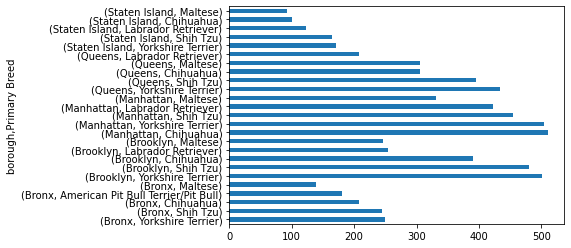

In [31]:
df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot.barh()

Below is the solution I originally came up with before going to office hours. I interpreted the question to mean we needed separate graphs showing the top 5 breeds for each borough!

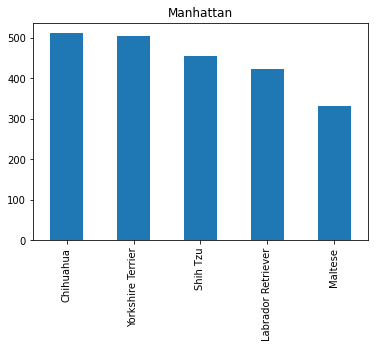

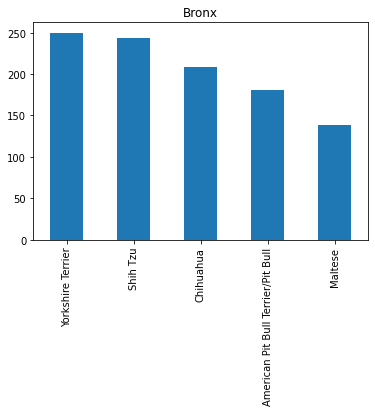

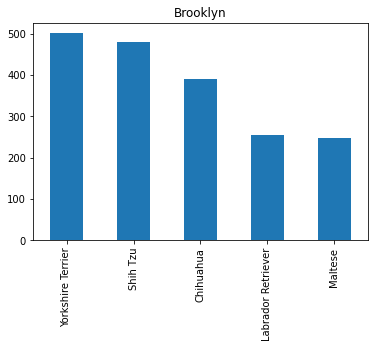

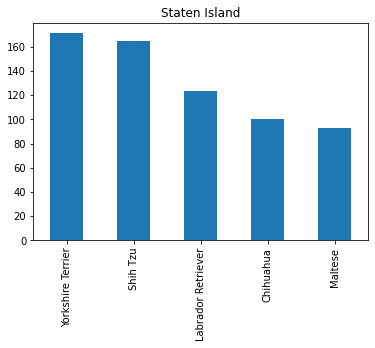

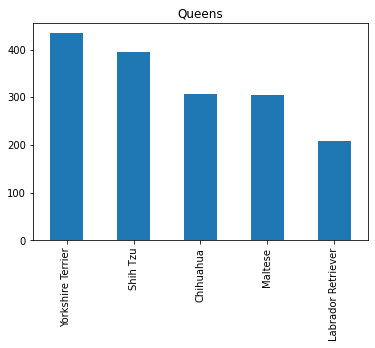

In [32]:
boroughs = df.borough.unique()
top_5_df = pd.DataFrame()

for borough in boroughs:
    temp_df = df[df.borough == borough]['Primary Breed'].value_counts().nlargest(5).to_frame().reset_index()
    temp_df['borough'] = borough
    top_5_df = pd.concat([top_5_df, temp_df])

top_5_df = top_5_df.rename(columns = {'index': 'primary_breed',
                                      'Primary Breed': 'count'})

for borough in boroughs:
    top_5_df[top_5_df.borough == borough].plot.bar(x = 'primary_breed', y = 'count', title = borough, xlabel="", legend=False)